<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/MoDesc_Deteccao_anomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atividade:** Feature Selection

**Grupo 3:**
* *Anna Carolina de Roldão*
* *Arthur Lira*
* *Erike Simon*
* *José Aparecido Silvano de Albuquerque*
* *Yaci Mair da Silva Ribeiro*

**Descrição**

Detecção de Anomalias em Dados de Transações Financeiras 🕵️‍♂️💳📈🔍

O objetivo deste estudo é aplicar técnicas de detecção de anomalias, especificamente o Isolation Forest e o DBSCAN, a um conjunto de dados de contas financeiras. O propósito é identificar contas de transações que se desviam significativamente do comportamento típico, o que pode indicar atividades fraudulentas ou incomuns.

# Configurações inicias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2005/dados/credit_card.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Investigando os dados

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [ ]:
# Existem dados faltantes?
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Existem dados duplicados?
df.duplicated().sum()

0

<ipython-input-6-c593ea0e706a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
<ipython-input-6-c593ea0e706a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Greens')


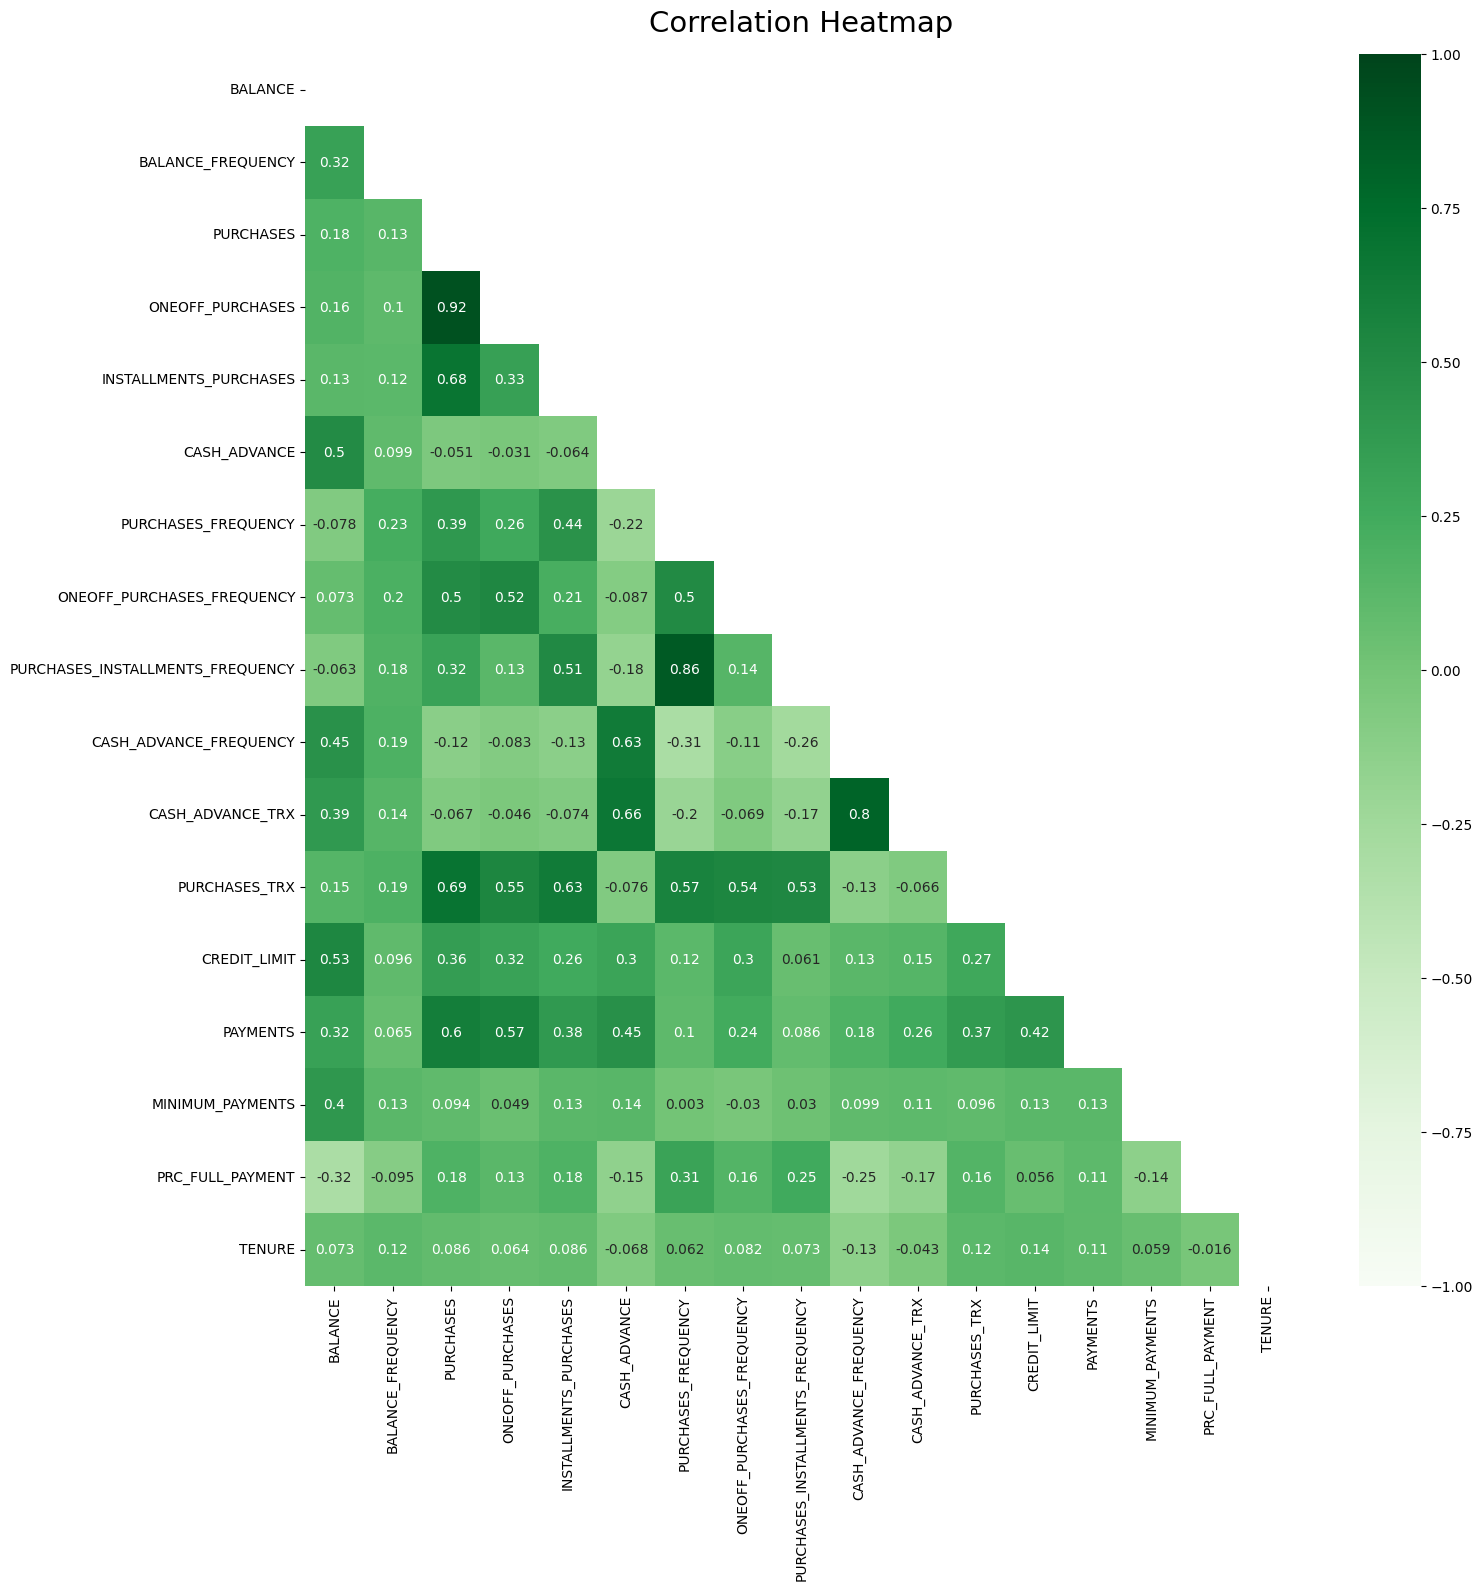

In [ ]:
plt.subplots(figsize=(16, 16))

mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Greens')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':21}, pad=16);

## Tratando dados faltantes

In [ ]:
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(), inplace=True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Seta a coluna 'CUST_ID' como sendo o índice do dataset

In [ ]:
df.set_index('CUST_ID', inplace=True)

# Padronização das variáveis

## Normalização dos dados com o Standard Scaler

In [ ]:
df_scaled = df.copy()
col_names = df_scaled.columns
features = df_scaled[col_names]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_Standard_Scaler = df.copy()

df_Standard_Scaler[col_names] = scaler.fit_transform(features.values)
df_Standard_Scaler.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,-2.540488e-17,1.000056,-0.751640,-0.690008,-0.332029,2.352559e-01,8.397489
BALANCE_FREQUENCY,8950.0,1.587805e-16,1.000056,-3.703271,0.049045,0.518084,5.180838e-01,0.518084
PURCHASES,8950.0,3.175610e-18,1.000056,-0.469552,-0.451001,-0.300454,5.004652e-02,22.483510
ONEOFF_PURCHASES,8950.0,-6.033659e-17,1.000056,-0.356934,-0.356934,-0.334040,-9.056763e-03,24.201066
INSTALLMENTS_PURCHASES,8950.0,3.175610e-17,1.000056,-0.454576,-0.454576,-0.356156,6.366321e-02,24.426889
CASH_ADVANCE,8950.0,-6.351220e-18,1.000056,-0.466786,-0.466786,-0.466786,6.435242e-02,22.011117
PURCHASES_FREQUENCY,8950.0,9.328354e-17,1.000056,-1.221758,-1.014125,0.024043,1.062211e+00,1.269843
ONEOFF_PURCHASES_FREQUENCY,8950.0,1.905366e-17,1.000056,-0.678661,-0.678661,-0.399319,3.269728e-01,2.673451
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,5.716098e-17,1.000056,-0.916995,-0.916995,-0.497629,9.701506e-01,1.599199
CASH_ADVANCE_FREQUENCY,8950.0,-1.595744e-16,1.000056,-0.675349,-0.675349,-0.675349,4.351492e-01,6.820521


## Aplicando o PCA

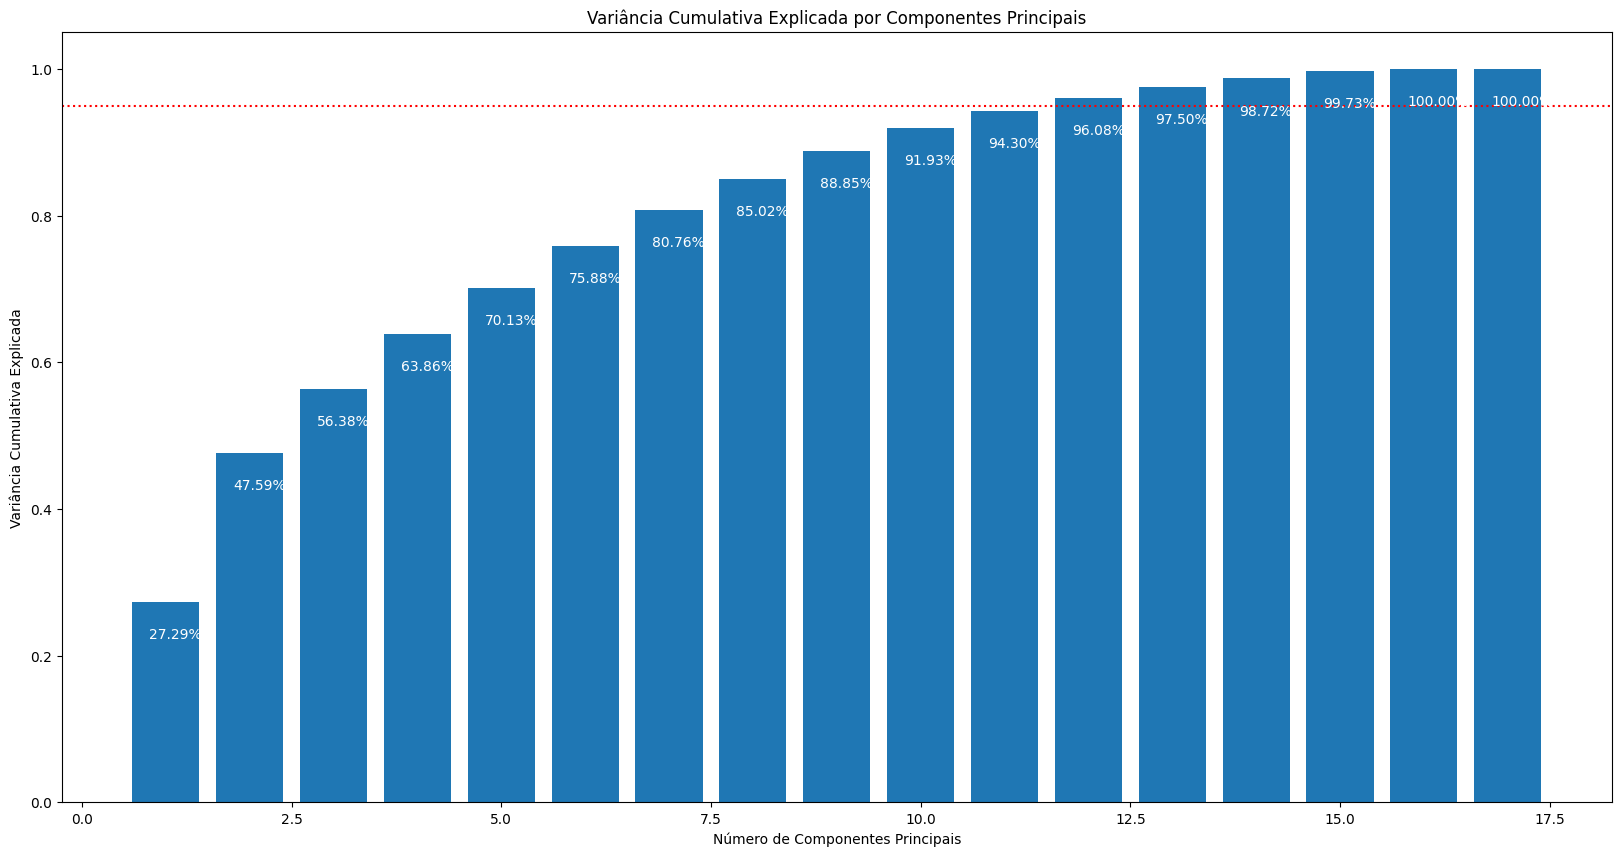

In [ ]:
# Inicialize o PCA com o número de componentes desejado ou None para manter todos os componentes
n_components = None
pca = PCA(n_components=n_components)

# Ajuste o modelo PCA aos seus dados
pca.fit(df_Standard_Scaler)

# Calcule a variância explicada cumulativa
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Crie um gráfico da variância cumulativa
plt.figure(figsize=(20, 10))
bars = plt.bar(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative)
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Cumulativa Explicada')
plt.title('Variância Cumulativa Explicada por Componentes Principais')
plt.axhline(y=0.95, c='red', linestyle=':')

# Adicione as porcentagens como rótulos nas barras
for bar, explained_variance in zip(bars, explained_variance_ratio_cumulative):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() - 0.05, f'{explained_variance:.2%}', fontsize=10, color='white')

plt.show()

In [ ]:
pca.explained_variance_ratio_

array([2.72900372e-01, 2.03019913e-01, 8.79197945e-02, 7.47997502e-02,
       6.26279204e-02, 5.75021129e-02, 4.88723464e-02, 4.25748554e-02,
       3.82880445e-02, 3.08000623e-02, 2.37189739e-02, 1.77363237e-02,
       1.42649185e-02, 1.21736915e-02, 1.01298988e-02, 2.67033632e-03,
       6.85223491e-07])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12, random_state=0)

principalComponents = pca.fit_transform(df_Standard_Scaler)

columns = []

for i in range(principalComponents.shape[1]):
  columns.append(f'Principal component {i}')

principalDf = pd.DataFrame(data = principalComponents, columns = columns)

principalDf

,Principal component 0,Principal component 1,Principal component 2,Principal component 3,Principal component 4,Principal component 5,Principal component 6,Principal component 7,Principal component 8,Principal component 9,Principal component 10,Principal component 11
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,-0.039303,0.115340,-0.077774,-0.235181,-0.053886
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,0.132411,0.687878,-0.777671,-0.871437,-0.601855
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,-0.169548,-0.883727,-0.001939,-0.761725,0.684204
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,-0.559099,-0.146564,0.393144,0.744858,0.149804
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,0.208399,0.584619,-0.121734,-0.455097,-0.106243
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.359629,-2.016145,-0.995355,-2.727433,0.268860,2.673305,-1.523465,0.201213,1.420524,-0.845404,0.194150,0.022548
8946,-0.564369,-1.639123,-1.290238,-1.860551,0.187104,3.384215,-1.083192,-0.554112,0.886695,-1.246153,0.066254,0.493984
8947,-0.926204,-1.810786,-0.474723,-2.280239,0.386553,2.976948,-1.369823,-0.345934,0.838190,-0.830005,0.120556,0.069954
8948,-2.336552,-0.657966,0.974725,-1.861279,0.069779,3.174380,-0.930511,0.148077,1.253573,0.268660,-0.306617,-0.114785


DBSCAN

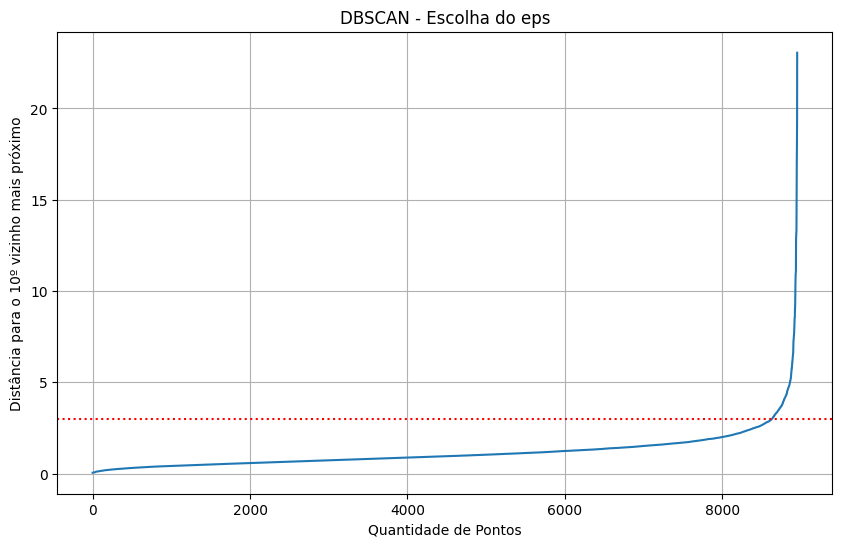

In [ ]:
# Calculate the distances to the min_samples nearest neighbors for each point
from sklearn.neighbors import NearestNeighbors
dbscan = DBSCAN(eps=None, min_samples=10)  # Fixa o min_sample

neigh = NearestNeighbors(n_neighbors=dbscan.min_samples)
neigh.fit(principalDf)
distances, _ = neigh.kneighbors()

# Sort the distances and plot the Knee Method curve
sorted_distances = sorted(distances[:, -1])
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_distances) + 1), sorted_distances)
plt.xlabel('Quantidade de Pontos')
plt.ylabel(f'Distância para o {dbscan.min_samples}º vizinho mais próximo')
plt.title('DBSCAN - Escolha do eps')
plt.grid(True)
plt.axhline(y=3, c='red', linestyle=':')
plt.show()

Visualizando os resultados

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Isolation'}, xlabel='Principal component 0', ylabel='Principal component 1'>

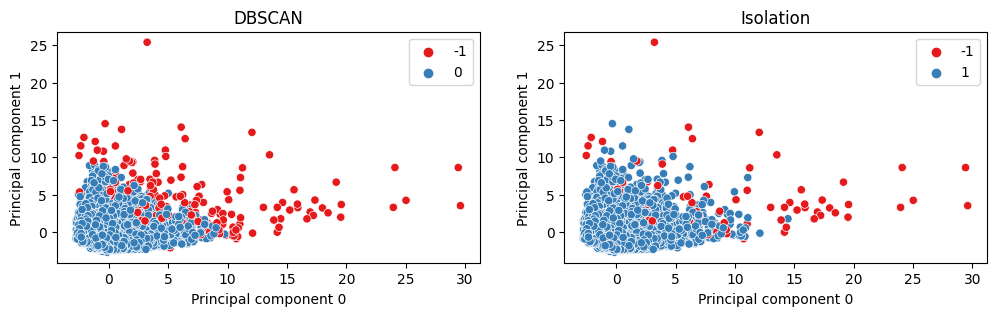

In [ ]:
# Criar o modelo Isolation Forest
# Treinar o modelo
iso_forest = IsolationForest(contamination=0.01)  # Ajuste a porcentagem de contaminação conforme necessário
dbscan = DBSCAN(eps=3, min_samples=10)
dbscan_labels =  dbscan.fit_predict(principalDf)
isolation_labels = iso_forest.fit_predict(principalDf)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 3))

axes[0].set_title('DBSCAN')
axes[1].set_title('Isolation')

sns.scatterplot(x=principalDf.iloc[:,0], y=principalDf.iloc[:,1], hue=dbscan_labels, ax=axes[0], palette='Set1')
sns.scatterplot(x=principalDf.iloc[:,0], y=principalDf.iloc[:,1], hue=isolation_labels, ax=axes[1], palette='Set1')

# Avaliando os modelos

Metricas para o DBSCAN

In [ ]:
print("Silhouette score: %0.3f" % silhouette_score(principalDf, dbscan_labels))
print("Davies bouldin score: %0.3f" % davies_bouldin_score(principalDf, dbscan_labels))

Silhouette score: 0.644
Davies bouldin score: 1.612


Metricas para o Isolation Forest

In [ ]:
print("Silhouette score: %0.3f" % silhouette_score(principalDf, isolation_labels))
print("Davies bouldin score: %0.3f" % davies_bouldin_score(principalDf, isolation_labels))

Silhouette score: 0.714
Davies bouldin score: 1.587


As métricas de Silhueta e Davies Bouldin para ambos os modelos indicam que os clusters resultantes têm valores semelhantes entre si, sugerindo que a precisão do agrupamento não é muito alta. No entanto, é importante observar que o método Isolation Forest obteve melhores resultados do que o DBSCAN.

Ao analisar o gráfico scatterplot acima, podemos notar que o método DBSCAN está rotulando mais pontos como possíveis 'fraudes' ou anomalias em comparação com o método Isolation Forest.